In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [3]:
alphabet = [
    'a', 'b', 'c', 'd', 'e', 'f', 'g',
    'h', 'i', 'j', 'k', 'l', 'm', 'n',
    'o', 'p', 'q', 'r', 's', 't', 'u',
    'v', 'w', 'x', 'y', 'z', ' '
]

In [4]:
def random_string(l, Sigma):
    string = ""
    for i in range(l):
        value = random.choice(Sigma)
        string += value
    return string

In [5]:
def initialize_population(N, l, Sigma):
    return [random_string(l, Sigma) for _ in range(0, N)]

In [6]:
def fraction_correct_characters(string, target):
    assert len(string) == len(target)
    
    correct = 0
    
    for i in range(0, len(string)):
        if string[i] == target[i]:
            correct += 1 
    
    return correct / len(target)

In [8]:
def calculate_fitness(string, target, fit_fn):
    if fit_fn == 'frac':
        return fraction_correct_characters(string, target)
    elif fit_fn == 'lev':
        return levenshtein_distance(string, target)
    else:
        return fraction_correct_characters(string, target)

In [9]:
def select_parent(pop, pop_fit, K, fit_fn):
    sel_pool = random.sample(list(zip(pop_fit, range(0, len(pop_fit)))), K)
    
    ind = None
    if fit_fn == 'frac':
        _, ind = max(sel_pool)
    elif fit_fn == 'lev':
        _, ind = min(sel_pool)
    
    return pop[ind]

In [10]:
def cross_over(str1, str2):
    assert len(str1) == len(str2)
    
    ind_to_split = random.randint(0, len(str1))
    
    return str1[:ind_to_split] + str2[ind_to_split:], str2[:ind_to_split] + str1[ind_to_split:]

In [11]:
def mutate(string, mu, Sigma):
    x = ""
    for i in range(0, len(string)):
        random_number = random.random()
        if mu > random_number:
            x += random_string(1, Sigma)
        else:
            x += string[i]
    
    return x

In [12]:
def step(pop, target, K, mu, Sigma, fit_fn):
    next_pop = []
    best_fit = None
    
    # calculate fitness of individuals in current population
    pop_fit = [calculate_fitness(x, target, fit_fn) for x in pop]
    avg_fit = sum(pop_fit) / len(pop_fit)
    
    if fit_fn == 'frac':
        best_fit = max(pop_fit)
    elif fit_fn == 'lev':
        best_fit = min(pop_fit)
    
    # create next population
    while(len(next_pop) != len(pop)):
        parent1 = select_parent(pop, pop_fit, K, fit_fn) 
        parent2 = select_parent(pop, pop_fit, K, fit_fn)
        
        child1, child2 = cross_over(parent1, parent2)
        next_pop.append(mutate(child1, mu, Sigma))
        next_pop.append(mutate(child2, mu, Sigma))
    
    return next_pop, avg_fit, best_fit

In [13]:
def GA(target, K, mu, Sigma, fit_fn = 'frac', max_iter=500, verbose=True):
    l = len(target)
    p_c = 1.0
    N = 1000
    iteration = 0
    
    pop = initialize_population(N, l, Sigma)
    
    while(not target in pop and iteration < max_iter):
        pop, avg_fit, best_fit = step(pop, target, K, mu, Sigma, fit_fn)
        iteration += 1
        if verbose:
            print("Iter: {}, avg fit: {}, best fit: {}".format(iteration, avg_fit, best_fit))
        
    return iteration

In [14]:
def create_box_plot(target, K, mu, Sigma, n_runs=20):
    generations = []
    
    for _ in range(0,20):
        generations.append(GA(target, K, mu, Sigma, verbose=False))
    
    plt.boxplot(generations, meanline=True, vert=False, labels=[20])
    plt.xlabel('Number of generations (t_fin)')
    plt.ylabel('Number of runs')
    plt.title('Distribution of t_fin, K = {}, mu = {}'.format(K, mu))
    plt.show()

In [15]:
def tune_mu(target, K, Sigma, num_steps=10, n_runs=20, upper_bound=1.0):
    # default: take 10 steps between mu in [0,1.0]
    assert upper_bound > 0.0 and upper_bound <= 1.0
    
    mus = np.arange(num_steps, dtype=float) / (float(num_steps) / upper_bound) 
    means = np.zeros(num_steps, dtype=float)
    stds = np.zeros(num_steps, dtype=float)
    
    for j, mu in enumerate(mus):
        gens = np.zeros(n_runs)
        for i in range(0, n_runs):
            gens[i] = GA(target, K, mu, Sigma, verbose=False)
        means[j] = np.mean(gens)
        stds[j] = np.std(gens)
        print("Simulation ({}/{}): [mu: {}, t_avg: {}, t_std: {}, n_runs: {}]".format(j+1, num_steps, mu, means[j], stds[j], n_runs))
    
    plt.errorbar(mus, means, stds, linestyle='None')
    plt.xlabel('Mutation rate (mu)')
    plt.ylabel('Number of generations (t_fin)')
    plt.show()

In [46]:
GA(random_string(45,alphabet), 2, 0.01, alphabet)

Iter: 1, avg fit: 0.03517777777777784, best fit: 0.2
Iter: 2, avg fit: 0.05102222222222271, best fit: 0.17777777777777778
Iter: 3, avg fit: 0.06800000000000074, best fit: 0.2
Iter: 4, avg fit: 0.0856666666666674, best fit: 0.2
Iter: 5, avg fit: 0.10417777777777874, best fit: 0.26666666666666666
Iter: 6, avg fit: 0.1246666666666676, best fit: 0.26666666666666666
Iter: 7, avg fit: 0.14508888888888985, best fit: 0.28888888888888886
Iter: 8, avg fit: 0.16691111111111198, best fit: 0.3111111111111111
Iter: 9, avg fit: 0.1892888888888894, best fit: 0.3333333333333333
Iter: 10, avg fit: 0.21213333333333376, best fit: 0.4222222222222222
Iter: 11, avg fit: 0.23444444444444507, best fit: 0.4
Iter: 12, avg fit: 0.2596444444444455, best fit: 0.4
Iter: 13, avg fit: 0.2829555555555571, best fit: 0.4222222222222222
Iter: 14, avg fit: 0.3038222222222234, best fit: 0.4444444444444444
Iter: 15, avg fit: 0.3283333333333336, best fit: 0.4666666666666667
Iter: 16, avg fit: 0.3480444444444445, best fit: 0.4

59

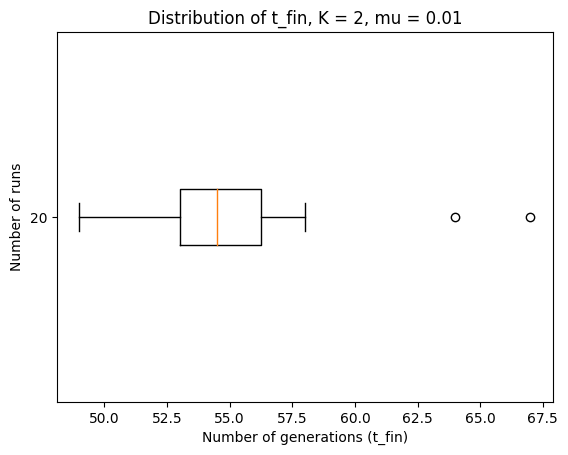

In [47]:
create_box_plot(random_string(45,alphabet), 2, 0.01, alphabet)

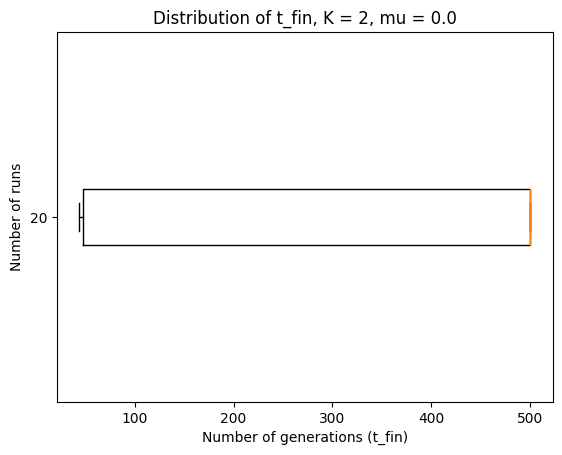

In [16]:
create_box_plot(random_string(45,alphabet), 2, 0.0, alphabet)

Simulation (1/20): [mu: 0.0, t_avg: 387.1, t_std: 195.5535476538332, n_runs: 20]
Simulation (2/20): [mu: 0.01, t_avg: 56.45, t_std: 4.306680856529771, n_runs: 20]
Simulation (3/20): [mu: 0.02, t_avg: 65.7, t_std: 5.692978130996114, n_runs: 20]
Simulation (4/20): [mu: 0.03, t_avg: 103.25, t_std: 15.782506138126479, n_runs: 20]
Simulation (5/20): [mu: 0.04, t_avg: 500.0, t_std: 0.0, n_runs: 20]
Simulation (6/20): [mu: 0.05, t_avg: 500.0, t_std: 0.0, n_runs: 20]
Simulation (7/20): [mu: 0.06, t_avg: 500.0, t_std: 0.0, n_runs: 20]
Simulation (8/20): [mu: 0.07, t_avg: 500.0, t_std: 0.0, n_runs: 20]
Simulation (9/20): [mu: 0.08, t_avg: 500.0, t_std: 0.0, n_runs: 20]
Simulation (10/20): [mu: 0.09, t_avg: 500.0, t_std: 0.0, n_runs: 20]
Simulation (11/20): [mu: 0.1, t_avg: 500.0, t_std: 0.0, n_runs: 20]
Simulation (12/20): [mu: 0.11, t_avg: 500.0, t_std: 0.0, n_runs: 20]
Simulation (13/20): [mu: 0.12, t_avg: 500.0, t_std: 0.0, n_runs: 20]
Simulation (14/20): [mu: 0.13, t_avg: 500.0, t_std: 0.0, 

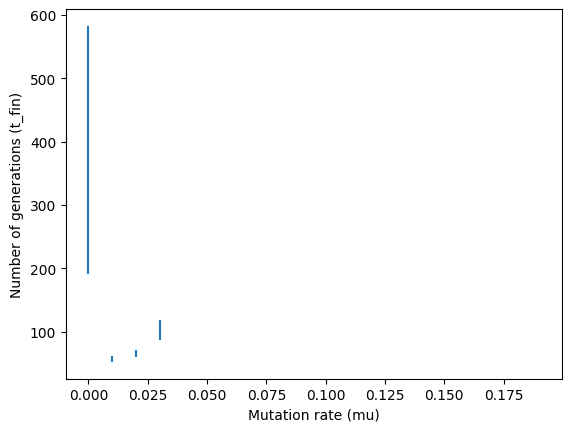

In [56]:
tune_mu(random_string(45,alphabet), 2, alphabet, num_steps=20, upper_bound=0.2)

Simulation (1/50): [mu: 0.0, t_avg: 319.4, t_std: 221.1975135484122, n_runs: 20]
Simulation (2/50): [mu: 0.0006, t_avg: 79.7, t_std: 36.40068680670737, n_runs: 20]
Simulation (3/50): [mu: 0.0012, t_avg: 63.15, t_std: 12.626460311583767, n_runs: 20]
Simulation (4/50): [mu: 0.0018, t_avg: 61.2, t_std: 12.870897404610139, n_runs: 20]
Simulation (5/50): [mu: 0.0024, t_avg: 60.4, t_std: 16.007498243010993, n_runs: 20]
Simulation (6/50): [mu: 0.003, t_avg: 55.95, t_std: 9.118525100036738, n_runs: 20]
Simulation (7/50): [mu: 0.0036, t_avg: 57.6, t_std: 7.565712127751095, n_runs: 20]
Simulation (8/50): [mu: 0.0042, t_avg: 53.1, t_std: 6.131068422387732, n_runs: 20]
Simulation (9/50): [mu: 0.0048, t_avg: 53.95, t_std: 6.793195124534551, n_runs: 20]
Simulation (10/50): [mu: 0.005399999999999999, t_avg: 54.45, t_std: 4.224630161327735, n_runs: 20]
Simulation (11/50): [mu: 0.006, t_avg: 59.0, t_std: 7.8230428862431785, n_runs: 20]
Simulation (12/50): [mu: 0.0066, t_avg: 57.9, t_std: 8.443340571124

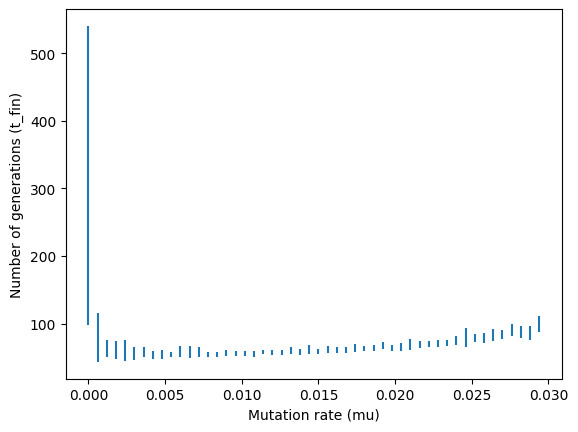

In [57]:
tune_mu(random_string(45,alphabet), 2, alphabet, num_steps=50, upper_bound=0.03)

Simulation (1/20): [mu: 0.0, t_avg: 500.0, t_std: 0.0, n_runs: 20]
Simulation (2/20): [mu: 0.01, t_avg: 35.2, t_std: 3.6276714294434105, n_runs: 20]
Simulation (3/20): [mu: 0.02, t_avg: 34.4, t_std: 2.6720778431774774, n_runs: 20]
Simulation (4/20): [mu: 0.03, t_avg: 36.9, t_std: 4.023679907746142, n_runs: 20]
Simulation (5/20): [mu: 0.04, t_avg: 41.3, t_std: 4.001249804748511, n_runs: 20]
Simulation (6/20): [mu: 0.05, t_avg: 47.45, t_std: 3.8532453853861943, n_runs: 20]
Simulation (7/20): [mu: 0.06, t_avg: 72.45, t_std: 12.947876273736941, n_runs: 20]
Simulation (8/20): [mu: 0.07, t_avg: 413.55, t_std: 126.07794216277483, n_runs: 20]
Simulation (9/20): [mu: 0.08, t_avg: 493.8, t_std: 22.31725789607675, n_runs: 20]
Simulation (10/20): [mu: 0.09, t_avg: 500.0, t_std: 0.0, n_runs: 20]
Simulation (11/20): [mu: 0.1, t_avg: 500.0, t_std: 0.0, n_runs: 20]
Simulation (12/20): [mu: 0.11, t_avg: 500.0, t_std: 0.0, n_runs: 20]
Simulation (13/20): [mu: 0.12, t_avg: 500.0, t_std: 0.0, n_runs: 20]


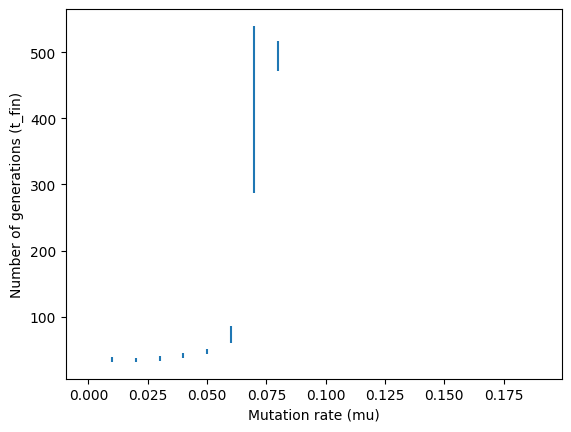

In [58]:
tune_mu(random_string(45,alphabet), 5, alphabet, num_steps=20, upper_bound=0.2)

Simulation (1/50): [mu: 0.0, t_avg: 500.0, t_std: 0.0, n_runs: 20]
Simulation (2/50): [mu: 0.0012, t_avg: 77.95, t_std: 23.863099128151816, n_runs: 20]
Simulation (3/50): [mu: 0.0024, t_avg: 49.75, t_std: 13.213156322393223, n_runs: 20]
Simulation (4/50): [mu: 0.0036, t_avg: 41.2, t_std: 8.286132994346639, n_runs: 20]
Simulation (5/50): [mu: 0.0048, t_avg: 39.65, t_std: 7.2268596222702435, n_runs: 20]
Simulation (6/50): [mu: 0.006, t_avg: 38.7, t_std: 7.7012985917960615, n_runs: 20]
Simulation (7/50): [mu: 0.0072, t_avg: 34.95, t_std: 4.499722213648305, n_runs: 20]
Simulation (8/50): [mu: 0.0084, t_avg: 36.15, t_std: 4.607331114647611, n_runs: 20]
Simulation (9/50): [mu: 0.0096, t_avg: 34.95, t_std: 3.840247387864485, n_runs: 20]
Simulation (10/50): [mu: 0.010799999999999999, t_avg: 34.35, t_std: 3.290516676754579, n_runs: 20]
Simulation (11/50): [mu: 0.012, t_avg: 34.1, t_std: 1.972308292331602, n_runs: 20]
Simulation (12/50): [mu: 0.0132, t_avg: 34.9, t_std: 2.233830790368868, n_runs

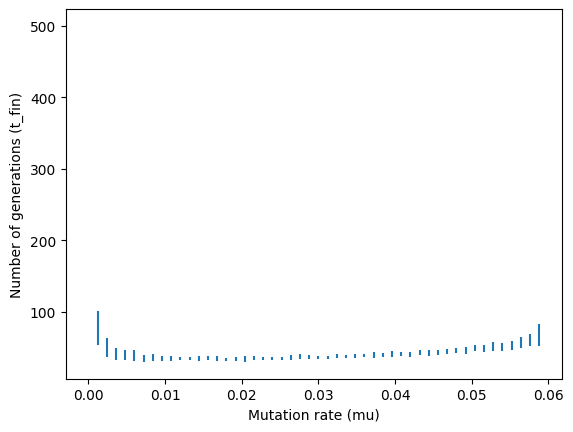

In [59]:
tune_mu(random_string(45,alphabet), 5, alphabet, num_steps=50, upper_bound=0.06)